In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_train=pd.read_csv("train.csv")

In [3]:
df_train.head(10)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,Target,V13
0,CUID1872,TID229526,EID2062082,485.69445,2020-03-20 22:51:30,376474,A,BA1,BB425559,PD44707,CC1,CP0,0,2020-03-21 00:00:00
1,CUID5533,TID244499,EID1459012,393.45200,2020-04-28 07:17:12,33227,A,BA4793,BB248012,PD39453,CC1,CP0,0,2020-04-28 00:00:00
2,CUID5278,TID311877,EID0,375.75000,2020-08-15 04:11:43,0,F,BA5631,BB166256,PD237664,CC1,CP0,0,NaN
3,CUID24,TID279685,EID0,6.97225,2020-06-26 01:11:42,0,C,BA7188,BB354924,PD99032,CC1,CP0,0,NaN
4,CUID449,TID104689,EID0,16.70000,2020-09-15 10:11:06,0,C,BA7236,BB354924,PD63422,CC1,CP0,0,NaN
5,CUID449,TID15835,EID0,15.03000,2020-04-27 03:11:20,0,C,BA7236,BB354924,PD63422,CC1,CP0,0,NaN
6,CUID6757,TID65730,EID0,18.78750,2020-07-16 10:11:46,0,C,BA8649,BB158648,PD366146,CC1,CP0,0,NaN
7,CUID1381,TID420679,EID0,375.75000,2020-08-13 06:11:14,0,F,BA8650,BB100097,PD394846,CC1,CP0,0,NaN
8,CUID1381,TID6634,EID0,125.25000,2020-04-07 21:11:05,0,F,BA8650,BB100097,PD394846,CC1,CP0,0,NaN
9,CUID1381,TID320776,EID0,41.75000,2020-08-30 02:11:15,0,F,BA8650,BB100097,PD394846,CC1,CP0,0,NaN


In [4]:
df_train.shape

(233633, 14)

In [5]:
df_train.describe(include="all")

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,Target,V13
count,233633,233633,233633,233633.000000,233633,233633.000000,233633,233633,233633,233633,233633,233633,233633.000000,231762
unique,3684,233633,206627,NaN,231004,NaN,6,35508,5765,40909,1,4075,NaN,2922
top,CUID914,TID229526,EID0,NaN,2020-09-15 08:11:46,NaN,A,BA58575,BB3336,PD254442,CC1,CP176843,NaN,2020-03-18 00:00:00
freq,3467,1,1330,NaN,5,NaN,228596,7100,26028,3547,233633,3467,NaN,1376
mean,NaN,NaN,NaN,266.360390,NaN,103071.463312,NaN,NaN,NaN,NaN,NaN,NaN,0.005521,NaN
std,NaN,NaN,NaN,1338.657212,NaN,143360.598172,NaN,NaN,NaN,NaN,NaN,NaN,0.074101,NaN
min,NaN,NaN,NaN,0.008350,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN
25%,NaN,NaN,NaN,12.525000,NaN,33227.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN
50%,NaN,NaN,NaN,33.400000,NaN,33227.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN
75%,NaN,NaN,NaN,115.230000,NaN,33227.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN


In [6]:
df_train.dtypes

V1         object
V2         object
V3         object
V4        float64
V5         object
V6          int64
V7         object
V8         object
V9         object
V10        object
V11        object
V12        object
Target      int64
V13        object
dtype: object

In [7]:
df_train.isnull().sum()

V1           0
V2           0
V3           0
V4           0
V5           0
V6           0
V7           0
V8           0
V9           0
V10          0
V11          0
V12          0
Target       0
V13       1871
dtype: int64

In [8]:
df_train.duplicated().sum()

0

In [9]:
df_train.corr()

,V4,V6,Target
V4,1.000000,0.042445,0.039263
V6,0.042445,1.000000,0.025384
Target,0.039263,0.025384,1.000000


In [10]:
df_train["V7"].value_counts()

A    228596
B      3043
C       894
E       574
D       348
F       178
Name: V7, dtype: int64

In [11]:
df_train["V7"].replace({'A':1 ,'B':2 ,'C':3,'D':4,'E':5,'F':6},inplace=True)

In [12]:
df_train.head(12)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,Target,V13
0,CUID1872,TID229526,EID2062082,485.69445,2020-03-20 22:51:30,376474,1,BA1,BB425559,PD44707,CC1,CP0,0,2020-03-21 00:00:00
1,CUID5533,TID244499,EID1459012,393.45200,2020-04-28 07:17:12,33227,1,BA4793,BB248012,PD39453,CC1,CP0,0,2020-04-28 00:00:00
2,CUID5278,TID311877,EID0,375.75000,2020-08-15 04:11:43,0,6,BA5631,BB166256,PD237664,CC1,CP0,0,NaN
3,CUID24,TID279685,EID0,6.97225,2020-06-26 01:11:42,0,3,BA7188,BB354924,PD99032,CC1,CP0,0,NaN
4,CUID449,TID104689,EID0,16.70000,2020-09-15 10:11:06,0,3,BA7236,BB354924,PD63422,CC1,CP0,0,NaN
5,CUID449,TID15835,EID0,15.03000,2020-04-27 03:11:20,0,3,BA7236,BB354924,PD63422,CC1,CP0,0,NaN
6,CUID6757,TID65730,EID0,18.78750,2020-07-16 10:11:46,0,3,BA8649,BB158648,PD366146,CC1,CP0,0,NaN
7,CUID1381,TID420679,EID0,375.75000,2020-08-13 06:11:14,0,6,BA8650,BB100097,PD394846,CC1,CP0,0,NaN
8,CUID1381,TID6634,EID0,125.25000,2020-04-07 21:11:05,0,6,BA8650,BB100097,PD394846,CC1,CP0,0,NaN
9,CUID1381,TID320776,EID0,41.75000,2020-08-30 02:11:15,0,6,BA8650,BB100097,PD394846,CC1,CP0,0,NaN


In [13]:
df_train.drop(["V11","V2"],axis=1,inplace=True)

In [14]:
df_train.sample(10)

,V1,V3,V4,V5,V6,V7,V8,V9,V10,V12,Target,V13
72243,CUID6711,EID949057,83.500,2020-06-26 06:53:11,33227,1,BA287255,BB407516,PD81923,CP181236,0,2020-03-11 00:00:00
70389,CUID914,EID1276347,16.700,2020-06-13 02:25:47,33227,1,BA320462,BB113702,PD127776,CP176843,0,2020-06-04 00:00:00
139020,CUID3688,EID957133,5.845,2020-08-09 02:42:05,33227,1,BA36232,BB157352,PD394021,CP424222,0,2019-10-24 00:00:00
43021,CUID5198,EID246743,12.525,2020-03-18 05:39:45,33227,1,BA210125,BB89496,PD279405,CP96250,0,2020-01-06 00:00:00
203185,CUID7345,EID1539513,83.500,2020-04-15 01:25:29,33227,1,BA50746,BB82486,PD387701,CP307305,0,2015-10-13 00:00:00
18531,CUID986,EID810796,1.670,2020-08-21 10:01:58,33227,1,BA256676,BB220965,PD157477,CP12117,0,2019-02-21 00:00:00
136165,CUID1185,EID689751,8.350,2020-05-13 20:58:15,33227,1,BA279248,BB3336,PD411727,CP411977,0,2019-12-29 00:00:00
199405,CUID4848,EID712636,25.050,2020-09-04 09:35:48,443300,1,BA166027,BB316973,PD238481,CP289525,0,NaN
177468,CUID6511,EID1856807,50.100,2020-05-20 05:14:24,33227,1,BA121646,BB3336,PD236595,CP186037,0,2017-12-10 00:00:00
149093,CUID3808,EID1348357,16.700,2020-07-26 00:06:26,355333,2,BA193615,BB371231,PD62902,CP43408,0,NaN


In [15]:
pd.set_option('display.max_rows', None)

df_train["V6"].value_counts()

33227     166955
391083     26111
3139       16237
363981      5978
380044      5958
355333      2630
359781      2422
443300      1751
376474      1496
353195      1116
0           1072
53           574
375702       367
2789         227
375291       219
446510        56
390891        46
6             24
391056        17
447014        12
390879        10
1812           7
1691           6
1232           5
1731           5
1238           5
1708           4
1418           4
1346           3
1331           3
3              3
2506           3
1369           3
2530           3
1410           3
1246           3
1432           3
390868         3
1269           3
2554           2
1273           2
2552           2
2624           2
1278           2
1259           2
1311           2
1713           2
2483           2
1313           2
447125         2
1391           2
1396           2
2499           2
1243           2
1296           2
1803           2
1780           2
1720           1
2665          

In [16]:
df = df_train[df_train.groupby('V6').V6.transform('count')>10].copy() 

In [17]:
df.shape

(233268, 12)

In [18]:
pd.set_option('display.max_rows', None)

df["V6"].value_counts()

33227     166955
391083     26111
3139       16237
363981      5978
380044      5958
355333      2630
359781      2422
443300      1751
376474      1496
353195      1116
0           1072
53           574
375702       367
2789         227
375291       219
446510        56
390891        46
6             24
391056        17
447014        12
Name: V6, dtype: int64

In [19]:
df.sample(10)

,V1,V3,V4,V5,V6,V7,V8,V9,V10,V12,Target,V13
12846,CUID5585,EID653703,422.05075,2020-07-13 07:21:24,3139,1,BA73406,BB322619,PD51219,CP421608,0,2018-03-17 00:00:00
44176,CUID2284,EID1239343,30.06000,2020-08-02 01:18:29,33227,1,BA225290,BB183042,PD248643,CP99504,0,2020-03-02 00:00:00
99188,CUID5882,EID822389,91.85000,2020-08-18 03:32:32,380044,1,BA162650,BB52590,PD381638,CP278645,0,2020-08-08 00:00:00
7763,CUID5405,EID473793,584.50000,2020-08-03 16:51:50,33227,1,BA272765,BB3336,PD347853,CP244995,0,2019-08-23 00:00:00
232866,CUID1913,EID923958,6.68000,2020-04-29 12:41:40,391083,1,BA383796,BB350509,PD357218,CP442067,0,2019-12-06 00:00:00
15851,CUID5532,EID692214,20.87500,2020-07-13 01:50:48,33227,1,BA34306,BB361140,PD214070,CP7323,0,2011-09-24 00:00:00
196186,CUID5333,EID115642,16.70000,2020-06-23 08:42:55,355333,2,BA443344,BB230277,PD143029,CP273701,0,2020-06-12 00:00:00
125060,CUID3665,EID1482856,8.35000,2020-09-04 03:03:41,33227,1,BA320780,BB95234,PD215425,CP372841,0,2020-09-04 00:00:00
101037,CUID1085,EID992398,167.00000,2020-03-25 00:33:53,33227,1,BA287898,BB393658,PD174831,CP281867,0,2017-08-17 00:00:00
33201,CUID4559,EID17253,25.05000,2020-06-29 08:40:34,33227,1,BA377425,BB431858,PD426113,CP55293,0,2018-02-26 00:00:00


<AxesSubplot:>

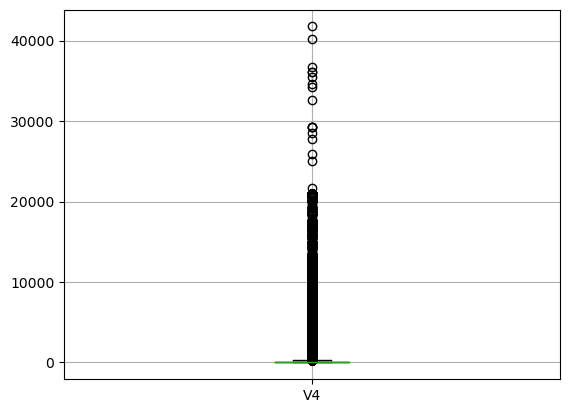

In [20]:
df.boxplot(column=["V4"])

In [21]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range=Q1-1.5*IQR
    upper_range=Q3+1.5*IQR
    return lower_range,upper_range

In [22]:
low_leadtime,high_leadtime=remove_outlier(df["V4"])
df["V4"]=np.where(df["V4"]>high_leadtime,high_leadtime,df["V4"])
df["V4"]=np.where(df["V4"]<low_leadtime,low_leadtime,df["V4"])

<AxesSubplot:>

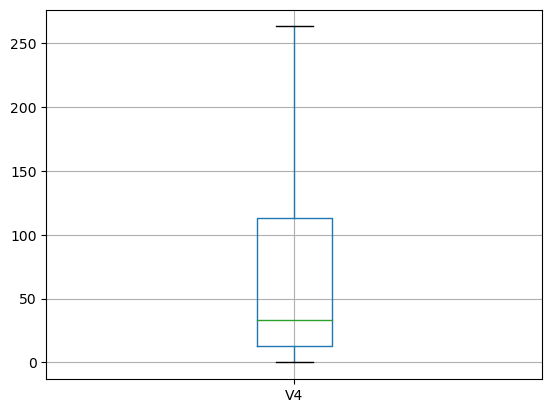

In [23]:
df.boxplot(column=["V4"])

In [24]:
df["Target"].value_counts()

0    231978
1      1290
Name: Target, dtype: int64

In [25]:
df.drop(["V1","V3","V5","V8","V9","V10","V12","V13"],axis=1,inplace=True)

In [26]:
df.sample(10)

,V4,V6,V7,Target
201372,7.93250,33227,1,0
202263,12.01565,33227,1,0
200879,29.22500,3139,1,0
48743,8.35000,33227,1,0
155032,16.70000,3139,1,0
104159,29.22500,33227,1,0
227446,58.45000,33227,1,0
1134,41.75000,0,3,0
227383,8.35000,33227,1,0
70611,15.03000,33227,1,0


In [27]:
# independant variables
X = df.drop(['Target'], axis=1)
# the dependent variable
y = df[['Target']]

In [28]:

from sklearn.model_selection import train_test_split


In [29]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=1)

In [30]:
from sklearn.linear_model import LogisticRegression


In [31]:
model=LogisticRegression()

In [32]:
model.fit(X_train,y_train)

LogisticRegression()

In [33]:
model.score(X_train,y_train)

0.9944943565623717

In [34]:
predictions=model.predict(X_test)

In [35]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.994412769180206

In [36]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)

array([[69590,     0],
       [  391,     0]], dtype=int64)

In [37]:
from sklearn import metrics

<AxesSubplot:>

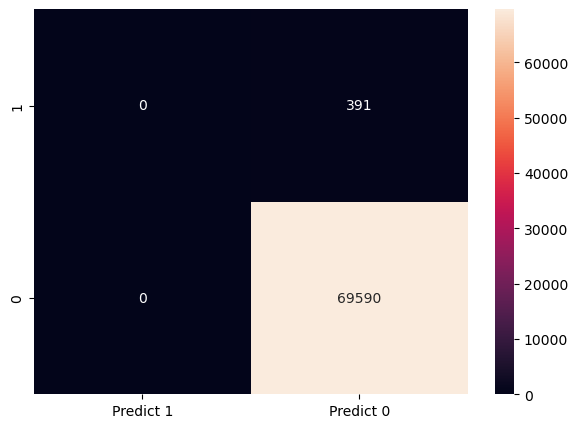

In [38]:
cm=metrics.confusion_matrix(y_test,predictions,labels=[1,0])
df_cm=pd.DataFrame(cm,index=[i for i in["1","0"]],
                  columns=[i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm,annot=True,fmt='g')

In [39]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     69590
           1       0.00      0.00      0.00       391

    accuracy                           0.99     69981
   macro avg       0.50      0.50      0.50     69981
weighted avg       0.99      0.99      0.99     69981



In [40]:
from sklearn.neighbors import KNeighborsClassifier

In [41]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [42]:
knn.score(X_train,y_train)

0.995057781697257

In [43]:
predictionss=knn.predict(X_test)

In [44]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictionss)

array([[69552,    38],
       [  318,    73]], dtype=int64)

In [45]:
print(metrics.classification_report(y_test,predictionss))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     69590
           1       0.66      0.19      0.29       391

    accuracy                           0.99     69981
   macro avg       0.83      0.59      0.64     69981
weighted avg       0.99      0.99      0.99     69981



In [46]:
from sklearn.tree import DecisionTreeClassifier

In [47]:
model2=DecisionTreeClassifier()
model2.fit(X_train,y_train)
print(model2.score(X_train,y_train))
print(model2.score(X_test,y_test))

0.9954436054309284
0.9947700090024435


In [48]:
model2_reg=DecisionTreeClassifier(max_depth=3,criterion='entropy')
model2_reg.fit(X_train,y_train)
print(model2.score(X_train,y_train))
print(model2.score(X_test,y_test))

0.9954436054309284
0.9947700090024435


In [49]:
from sklearn.naive_bayes import GaussianNB
model_naive=GaussianNB()
model_naive.fit(X_train,y_train)
print(model_naive.score(X_train,y_train))
print(model_naive.score(X_test,y_test))

0.9944943565623717
0.994412769180206


In [50]:
from sklearn.ensemble import AdaBoostClassifier
model_ada=AdaBoostClassifier(n_estimators=1)
model_ada.fit(X_train,y_train)
print(model_ada.score(X_train,y_train))
print(model_ada.score(X_test,y_test))

0.9944943565623717
0.994412769180206


In [51]:
from sklearn.ensemble import GradientBoostingClassifier
model_boost=GradientBoostingClassifier(n_estimators=1)
model_boost.fit(X_train,y_train)
print(model_boost.score(X_train,y_train))
print(model_boost.score(X_test,y_test))

0.9947331998260731
0.9946271130735486


In [52]:
from sklearn.ensemble import RandomForestClassifier
model_forest=RandomForestClassifier(max_depth=3)
model_forest.fit(X_train,y_train)
print(model_forest.score(X_train,y_train))
print(model_forest.score(X_test,y_test))

0.9944943565623717
0.994412769180206


In [53]:
from sklearn.svm import SVC
model_svc=SVC()
model_svc.fit(X_train,y_train)
print(model_svc.score(X_train,y_train))
print(model_svc.score(X_test,y_test))

0.9944943565623717
0.994412769180206


In [54]:
df1=pd.read_csv("test.csv")

In [55]:
df1.shape

(215852, 13)

In [56]:
df1.sample(10)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13
205202,CUID2643,TID446747,EID1640726,109.719,07-10-2020 23:09,33227,A,BA119168,BB199437,PD77015,CC1,CP386718,08-10-2020 00:00
87682,CUID6366,TID432468,EID1154506,167.000,01-09-2020 07:13,33227,A,BA221268,BB260440,PD232501,CC1,CP280098,04-07-2020 00:00
166027,CUID4783,TID19376,EID1687548,12.525,03-05-2020 19:14,33227,A,BA251820,BB79040,PD122630,CC1,CP205067,06-06-2017 00:00
197734,CUID3715,TID310958,EID1510558,16.700,14-08-2020 02:04,33227,A,BA276464,BB3336,PD236595,CC1,CP353182,27-04-2018 00:00
55497,CUID1116,TID12578,EID30207,16.700,20-04-2020 20:03,33227,A,BA108004,BB135501,PD419343,CC1,CP148207,12-03-2020 00:00
7260,CUID4369,TID55400,EID1726816,4.175,30-06-2020 04:38,33227,A,BA255823,BB380778,PD413409,CC1,CP136862,10-06-2020 00:00
117586,CUID6036,TID437186,EID2001525,16.700,08-09-2020 22:49,391083,A,BA299638,BB290908,PD307562,CC1,CP392367,26-06-2020 00:00
194307,CUID394,TID81710,EID1408741,36.740,10-08-2020 08:35,33227,A,BA140048,BB263627,PD140282,CC1,CP338507,27-07-2020 00:00
152172,CUID6173,TID371447,EID638258,19.205,24-05-2020 05:33,33227,A,BA172949,BB393658,PD417403,CC1,CP116693,12-01-2020 00:00
159584,CUID5560,TID287895,EID787475,584.500,10-07-2020 01:57,33227,A,BA411110,BB183042,PD104422,CC1,CP161076,08-07-2020 00:00


In [57]:
df2=df1.drop(['V1','V2','V3','V5','V8','V9','V10','V10','V11','V12','V13'],axis=1)

In [58]:
df2["V7"].value_counts()

A    210407
B      2342
D      1331
C       941
E       605
F       226
Name: V7, dtype: int64

In [59]:
df2["V7"].replace({'A':1 ,'B':2 ,'C':3,'D':4,'E':5,'F':6},inplace=True)

In [60]:
df2.head(10)

,V4,V6,V7
0,4154.1250,33227,1
1,8350.0000,33227,1
2,20.8750,363981,1
3,20457.5000,33227,1
4,4154.1250,33227,1
5,4154.1250,33227,1
6,20.8750,33227,1
7,4154.1250,33227,1
8,4154.1250,33227,1
9,20349.1337,33227,1


<AxesSubplot:>

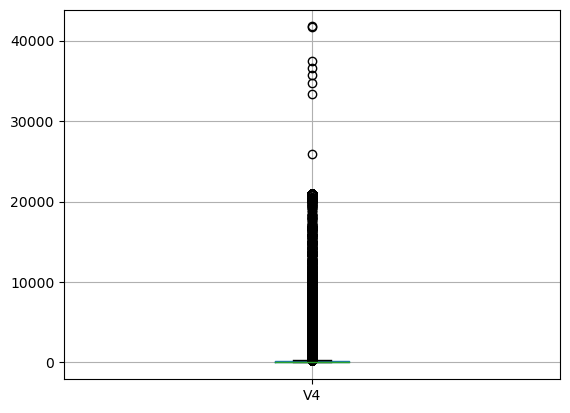

In [61]:
df2.boxplot(column=["V4"])

In [62]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range=Q1-1.5*IQR
    upper_range=Q3+1.5*IQR
    return lower_range,upper_range

In [63]:
low_leadtime,high_leadtime=remove_outlier(df2["V4"])
df2["V4"]=np.where(df2["V4"]>high_leadtime,high_leadtime,df2["V4"])
df2["V4"]=np.where(df2["V4"]<low_leadtime,low_leadtime,df2["V4"])

<AxesSubplot:>

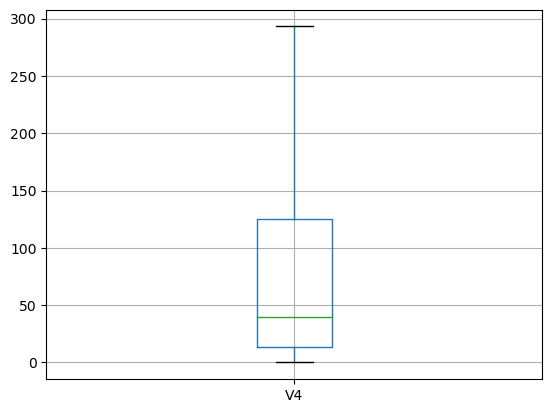

In [64]:
df2.boxplot(column=["V4"])

In [68]:
y_predicted=model_svc.predict(df2)

In [69]:
sample_submission=pd.DataFrame({
    "V2":df1["V2"],
    "Target": y_predicted
})

In [71]:
sample_submission.to_csv("hsbc_model_svc.csv",index=False)